## Using Volatility forecasted from GARCH into the BSM model, Rate = Fed 1 year yeild, Time - 20th Sept, 2024, Stock = 205

In [43]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Fetch Tesla stock data from Yahoo Finance API
tesla = yf.Ticker("TSLA")
tesla_history = tesla.history(start="2010-01-01", end="2023-03-01")

## Theory vs market plot with historical values

In [60]:
tesla_calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Theoretical Price,Price Diff,optionPrice
0,TSLA240920C00050000,2023-02-27 20:58:31+00:00,50.0,164.12,0.00,0.00,0.0,0.0,1,0,0.000010,True,REGULAR,USD,5.710007,158.409993,153.759942
1,TSLA240920C00055000,2023-02-03 17:31:28+00:00,55.0,148.34,0.00,0.00,0.0,0.0,3,0,0.000010,True,REGULAR,USD,5.710007,142.629993,149.141486
2,TSLA240920C00060000,2023-02-22 20:35:32+00:00,60.0,148.65,0.00,0.00,0.0,0.0,1,0,0.000010,True,REGULAR,USD,5.710007,142.939993,144.528644
3,TSLA240920C00065000,2023-02-27 18:24:06+00:00,65.0,151.30,0.00,0.00,0.0,0.0,1,0,0.000010,True,REGULAR,USD,5.710007,145.589993,139.924763
4,TSLA240920C00070000,2023-02-08 16:34:10+00:00,70.0,138.80,0.00,0.00,0.0,0.0,2,0,0.000010,True,REGULAR,USD,5.710007,133.089993,135.334202
5,TSLA240920C00075000,2023-01-27 18:50:25+00:00,75.0,114.60,132.95,134.55,0.0,0.0,4,10,0.571843,True,REGULAR,USD,5.710007,108.889993,130.762316
6,TSLA240920C00080000,2023-02-27 20:31:13+00:00,80.0,140.33,0.00,0.00,0.0,0.0,18,0,0.000010,True,REGULAR,USD,5.710007,134.619993,126.215371
7,TSLA240920C00085000,2023-02-24 17:51:55+00:00,85.0,124.00,0.00,0.00,0.0,0.0,1,0,0.000010,True,REGULAR,USD,5.710007,118.289993,121.700403
8,TSLA240920C00090000,2023-02-06 16:11:47+00:00,90.0,120.91,0.00,0.00,0.0,0.0,2,0,0.000010,True,REGULAR,USD,5.710007,115.199993,117.225036
9,TSLA240920C00095000,2023-02-24 17:01:09+00:00,95.0,119.50,0.00,0.00,0.0,0.0,2,0,0.000010,True,REGULAR,USD,5.710007,113.789993,112.797279


Text(0, 0.5, 'Price of call option')

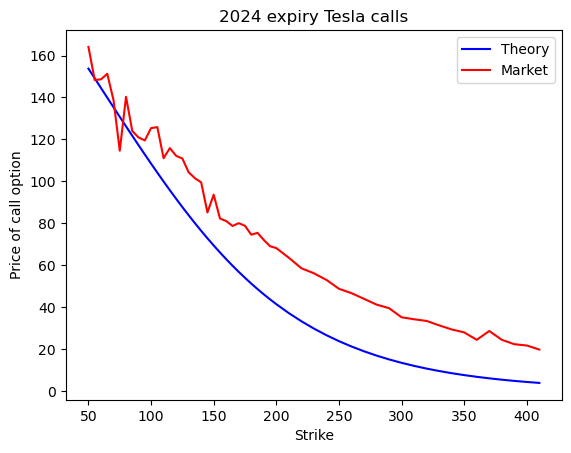

## AFTER feeding GARCH/ forecasted volatility 


Text(0, 0.5, 'Price of call option')

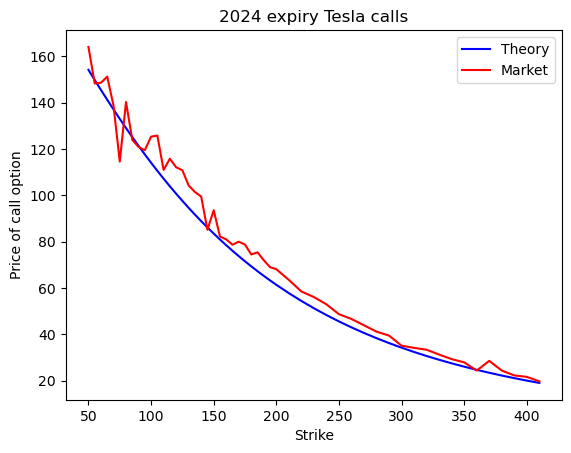

In [58]:

# Define Black-Scholes function for European call options
def bs_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

data = tesla_calls

# Define parameters
S = 200   # Stock price
r = 0.050  # Risk-free rate
sigma = 0.57  # Volatility # Can use the forecasted from GARCH model

# Calculate option price for each row using Black-Scholes
optionPrices = []
for index, row in data.iterrows():
    K = row['strike']
    T = 570 / 365
    optionPrices.append(bs_call(S, K, T, r, sigma))
    
# Add Theoretical optionPrice column 
data['optionPrice'] = optionPrices

plt.plot(data['strike'],data['optionPrice'], color = 'blue', label = "Theory")
plt.plot(data['strike'],data['lastPrice'], color = 'red', label = "Market")

plt.legend()
plt.title("2024 expiry Tesla calls")
plt.xlabel('Strike')
plt.ylabel('Price of call option')